# Exercise 6

In [22]:
from PIL import Image 
import numpy as np
import os

trainingData = np.array([])

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            # Convert the image to grayscale and resize if necessary
            # img = img.convert('L').resize((28, 28))
            # Convert the image to numpy array and normalize pixel values
            img_array = np.array(img)
            img_array = img_array.reshape(-1)
            img_array = img_array / 250
            images.append(img_array)
    return images

# Get the Training data
for i in range(10):
    folder_path = f"./ReducedMnist/ReducedMNISTData/ReducedTraingingdata/{i}/"
    # print(folder_path)
    images = load_images_from_folder(folder_path)
    images_array = np.array(images)
    labels = np.full(images_array.shape[0], i)
    matToAdd = np.c_[images_array, labels]
    if len(trainingData.shape) == 1:
        trainingData = matToAdd
    elif len(trainingData.shape) == 2:
        trainingData = np.vstack((trainingData, matToAdd))

print("Shape Training Data:", trainingData.shape)

Shape Training Data: (10000, 785)


In [23]:
testData = np.array([])

# Get the Test data
for i in range(10):
    folder_path = f"./ReducedMnist/ReducedMNISTData/ReducedTestingdata/{i}/"
    # print(folder_path)
    images = load_images_from_folder(folder_path)
    images_array = np.array(images)
    labels = np.full(images_array.shape[0], i)
    matToAdd = np.c_[images_array, labels]
    if len(testData.shape) == 1:
        testData = matToAdd
    elif len(testData.shape) == 2:
        testData = np.vstack((testData, matToAdd))

print("Shape Testing Data:", testData.shape)

Shape Testing Data: (2000, 785)


In [24]:
X_train = trainingData[:, :784]
y_train = trainingData[:, 784:]

In [25]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV 

y_train = y_train.ravel()
model = svm.SVC()

In [27]:
from sklearn.model_selection import GridSearchCV 
param_grid_rbf = {'C': [0.1, 1, 2, 3, 4, 5],  
              'gamma': [10, 1, 0.1, 0.01], 
              'kernel': ['rbf']} 
grid_linear = GridSearchCV(model, param_grid_rbf, refit = True, verbose = 3)
grid_linear.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.833 total time=  41.7s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.844 total time=  41.4s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.835 total time=  40.9s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.830 total time=  41.9s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.832 total time=  41.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=  40.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.104 total time=  42.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=  47.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.101 total time=  46.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.105 total time=  46.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.333 total time=  47.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5], 'gamma': [10, 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

Before trying anything, I will handwrite what are the best parameters: 

[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=  16.9s

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.963 total time=   8.6s

[CV 1/5] END .......C=2, gamma=0.01, kernel=rbf;, score=0.968 total time=   8.2s

[CV 2/5] END .......C=3, gamma=0.01, kernel=rbf;, score=0.969 total time=   8.1s

[CV 2/5] END .......C=4, gamma=0.01, kernel=rbf;, score=0.970 total time=   9.5s

[CV 2/5] END .......C=5, gamma=0.01, kernel=rbf;, score=0.970 total time=  11.4s

We can see that gamma = 0.01 is the best paramters to use, now let's extend C

The best parameters were: {'C': 4, 'gamma': 0.01, 'kernel': 'rbf'}

In [17]:
X_test = testData[:, :784]
y_test = testData[:, 784:]
X_test, y_test = shuffle(X_test, y_test, random_state=42)

model = svm.SVC(C=4, gamma=0.01, kernel='rbf')
score = model.fit(X_train, y_train).score(X_test, y_test)
print("Score:", score)
y_predict = model.predict(X_test)
result = 0
for i in range(len(y_predict)):
    if y_predict[i] != y_test[i]:
        result += 1
result = 1 - (result/(len(y_predict)))
print(result)

Score: 0.977
0.977


In [28]:
list_classifier = []
y_train = y_train.astype(int)

for i in range(10):
    target = (y_train == i).astype(int)
    # for i in range(len(target)):
    #  # if y_train[i] == 0:
    #      print(f"Reshape: {y_train[i]} and target: {target[i]}")
    binary_classifier = svm.SVC(C=4, gamma=0.01, kernel='rbf')
    binary_classifier.fit(X_train, target)
    list_classifier.append(binary_classifier)

In [20]:
def one_vs_all_prediction(list_of_classifier, X):
    predictions = []
    for classifier in list_of_classifier:
        proba = classifier.predict(np.array([X]))
        result = 0
        for i in range(len(proba)):
            if proba[i] != 0:
                result += 1
        result = result/len(proba)
        predictions.append(result)
    predicted_classes = np.argmax(predictions, axis=0)
    return predicted_classes

In [21]:
result = 0
for i in range(len(X_test)):
    y_pred = one_vs_all_prediction(list_classifier, X_test[i])
    if y_pred != y_test[i]:
        result += 1
result = 1 - (result / len(X_test))
print("Result:", result)

Result: 0.9615


Finally we don't have better results, let's see later


In [17]:
# Confusion Matrix for the model
confusion_matrix = [[0 for _ in range(10)] for _ in range(10)]

y_pred = model.predict(X_test)

In [18]:
for i in range(len(y_test)):
    confusion_matrix[int(y_pred[i])][int(y_test[i][0])] += 1

In [19]:
for i in range(10):
    for j in range(10):
        print("{:4}".format(confusion_matrix[i][j]), end="|")
    print()

 198|   0|   2|   0|   0|   1|   1|   0|   0|   0|
   0| 199|   0|   0|   0|   0|   0|   0|   0|   0|
   0|   0| 189|   1|   1|   0|   0|   4|   0|   0|
   0|   0|   1| 196|   0|   1|   0|   0|   0|   0|
   1|   0|   0|   0| 194|   1|   0|   0|   1|   4|
   0|   0|   0|   0|   0| 193|   0|   0|   1|   0|
   0|   0|   0|   0|   0|   3| 199|   0|   3|   0|
   0|   0|   2|   0|   1|   0|   0| 196|   0|   0|
   1|   1|   6|   1|   0|   1|   0|   0| 195|   1|
   0|   0|   0|   2|   4|   0|   0|   0|   0| 195|


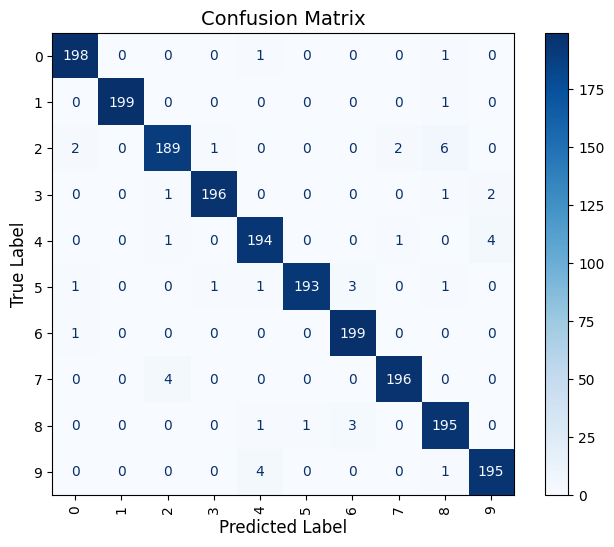

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt

# y_predicted = [np.argmax(y_pred[x]) for x in range(y_pred.shape[0])]
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])

# Plot the confusion matrix with customizations
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot the confusion matrix with custom display labels and fontsize
cm_display.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')  # Customize the plot as needed
plt.xticks(fontsize=10)  # Adjust the x-axis label size
plt.yticks(fontsize=10)  # Adjust the y-axis label size
plt.xlabel('Predicted Label', fontsize=12)  # Adjust the x-axis label size
plt.ylabel('True Label', fontsize=12)  # Adjust the y-axis label size
plt.title('Confusion Matrix', fontsize=14)  # Adjust the title size

plt.show()

In [21]:
confusion_matrix2 = [[0 for _ in range(10)] for _ in range(10)]
y_prediction_list = []
for i in range(len(X_test)):
    y_predict = one_vs_all_prediction(list_classifier, X_test[i])
    y_prediction_list.append(y_predict)

In [22]:
for i in range(len(y_test)):
    confusion_matrix2[y_prediction_list[i]][int(y_test[i][0])] += 1

In [23]:
for i in range(10):
    for j in range(10):
        print("{:4}".format(confusion_matrix2[i][j]), end="|")
    print()

 200|   1|   8|  10|  10|  12|   6|   0|   4|   5|
   0| 198|   0|   0|   0|   0|   0|   0|   0|   0|
   0|   0| 184|   0|   0|   0|   0|   4|   0|   0|
   0|   0|   0| 190|   0|   1|   0|   0|   0|   0|
   0|   0|   0|   0| 190|   0|   0|   0|   0|   3|
   0|   0|   0|   0|   0| 185|   0|   0|   0|   1|
   0|   0|   0|   0|   0|   1| 194|   0|   2|   0|
   0|   0|   2|   0|   0|   0|   0| 196|   0|   0|
   0|   1|   6|   0|   0|   1|   0|   0| 194|   1|
   0|   0|   0|   0|   0|   0|   0|   0|   0| 190|


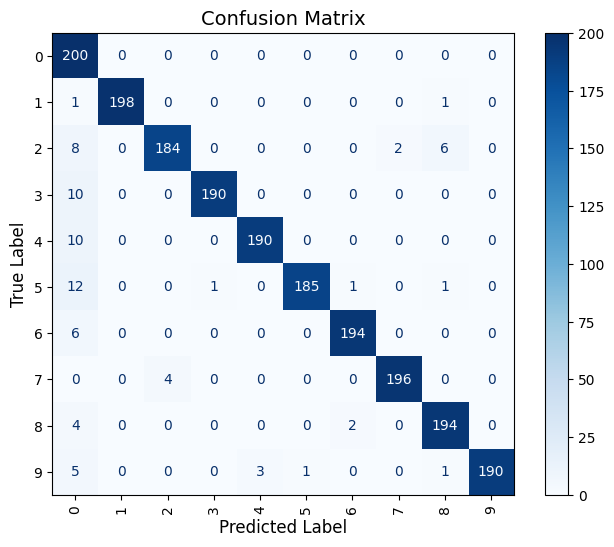

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt

# y_predicted = [np.argmax(y_pred[x]) for x in range(y_pred.shape[0])]
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction_list)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])

# Plot the confusion matrix with customizations
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot the confusion matrix with custom display labels and fontsize
cm_display.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')  # Customize the plot as needed
plt.xticks(fontsize=10)  # Adjust the x-axis label size
plt.yticks(fontsize=10)  # Adjust the y-axis label size
plt.xlabel('Predicted Label', fontsize=12)  # Adjust the x-axis label size
plt.ylabel('True Label', fontsize=12)  # Adjust the y-axis label size
plt.title('Confusion Matrix', fontsize=14)  # Adjust the title size

plt.show()

Right Now there is a problem of missclassification around the value 0. We see that the models tends to really classify the numbers it can't recognize as 0. It then appears that this is a reccurent problem even if it reaches a 95% accuracy.